In [27]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from sklearn import datasets
api_weather = "8b7d56520bdedc7f815d70e636683b85"

In [28]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_weather}&units={units}&q="

In [29]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information received is: [5.51, 5.31, 5.25, 5.5, 26, 27.15, 10.42, 12.35, 20.03, 21.3]


In [30]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,5.51
1,London,51.51,5.31
2,Oslo,59.91,5.25
3,Beijing,39.91,5.50
4,Mumbai,19.01,26.00
5,Manila,14.60,27.15
6,New York,40.71,10.42
7,Seattle,47.61,12.35
8,Dallas,32.77,20.03
9,Taipei,25.05,21.30


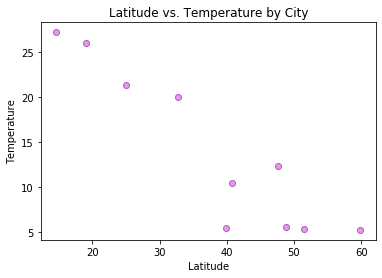

In [32]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data["lat"],weather_data["temp"],facecolors="plum", edgecolors="mediumorchid")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature by City")
plt.show()

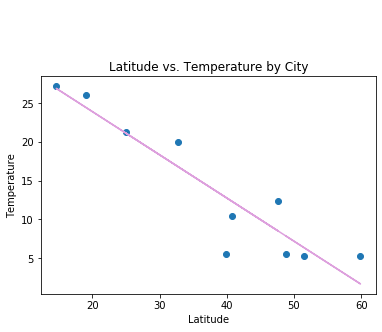

In [36]:
# Perform a linear regression on temperature vs. latitude
# Get regression values
# Create line equation string
# Create Plot
# Label plot and annotate the line equation
# Print r square value
# Show plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(weather_data["lat"],weather_data["temp"])
regress_values=weather_data["lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(weather_data["lat"],weather_data["temp"] )
plt.plot(weather_data["lat"], regress_values, color='plum')
plt.annotate(line_eq,(20,36), color='medium orchid', fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature by City")
plt.show()

In [37]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
lat = 43.77
print(f"The temperature at 43.77 will be {round(slope * lat + intercept,2)}.")

The temperature at 43.77 will be 10.67.
